In [174]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [176]:
import os
print(os.path.exists('./models/object_detection.h5'))

True


In [178]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import metrics

# Registering the custom metric
@tf.keras.utils.register_keras_serializable()
def mse(y_true, y_pred):
    return metrics.mean_squared_error(y_true, y_pred)

# Define the CustomScaleLayer class, now using tf.multiply and adding compute_output_shape
class CustomScaleLayer(tf.keras.layers.Layer):
    def __init__(self, scale, name=None, **kwargs):
        super().__init__(name=name, **kwargs)
        self.scale = scale

    def call(self, inputs):
        # If inputs are a list (e.g., from residual connections), combine them first
        if isinstance(inputs, list):
            combined_input = tf.add_n(inputs)  # Sum the tensors in the list
            return combined_input * self.scale
        # If inputs are a single tensor, apply scaling directly
        return inputs * self.scale

    def compute_output_shape(self, input_shape):
        # If input_shape is a list (e.g., from residual connections), return the shape of the first tensor
        if isinstance(input_shape, list):
            return input_shape[0]
        # Otherwise, return the input shape
        return input_shape

# Load the model, passing the custom layer and custom metric
model = load_model(
    'C:/Users/paulo/Pictures/YOLO_OCR/models/object_detection.h5',
    custom_objects={'CustomScaleLayer': CustomScaleLayer, 'mse': mse}
)


print("Model loaded successfully!")


Model loaded successfully!


In [179]:
#load model 
# model = tf.keras.models.load_model('/models/object_detection.h5')
# model = tf.keras.models.load_model('C:/Users/paulo/Pictures/YOLO_OCR/models/object_detection.h5')
# print('model loaded sucessfully')

In [180]:
path = './test_images/N207.jpeg'
image = load_img(path) #PIL object
image = np.array(image,dtype = np.uint8) # 8 bit array (0, 255)
image1 = load_img(path, target_size = (224, 224))
image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output

In [181]:
# size of the original image
h , w , d = image.shape
print('Height of the image', h)
print('Width of the image', w)

Height of the image 423
Width of the image 541


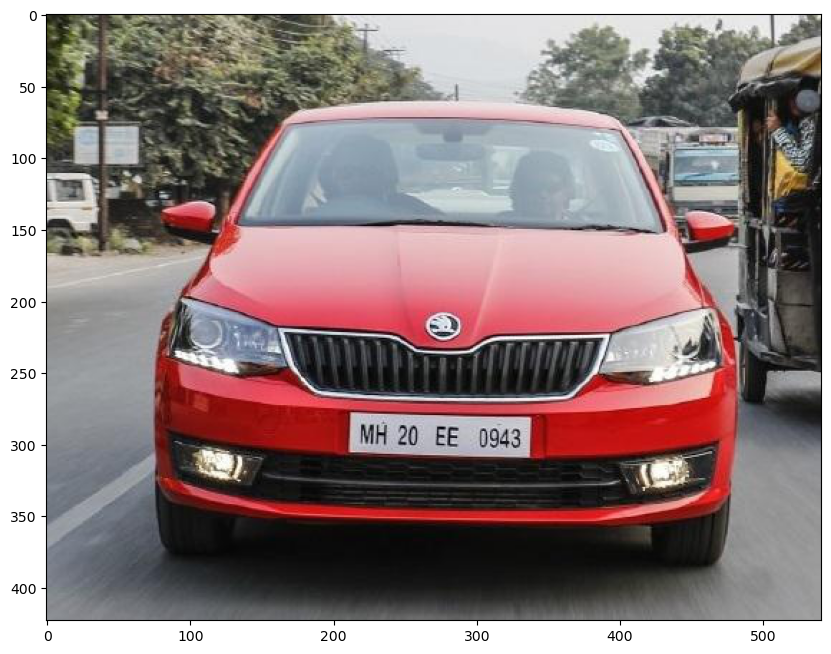

In [182]:
plt.figure(figsize=(10,8)) 
plt.imshow(image)
plt.show()

In [253]:
image_arr_224.shape

(224, 224, 3)

In [255]:
test_arr = image_arr_224.reshape(1, 224, 224, 3)
test_arr.shape

(1, 224, 224, 3)

In [257]:
# make predictions
coords = model.predict(test_arr)
coords

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[0.37838346, 0.64263725, 0.51485443, 0.8374066 ]], dtype=float32)

In [259]:
# denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm


In [261]:
coords = coords.astype(np.int32)
coords

array([[ 84, 143, 115, 187]])

(84, 115) (143, 187)


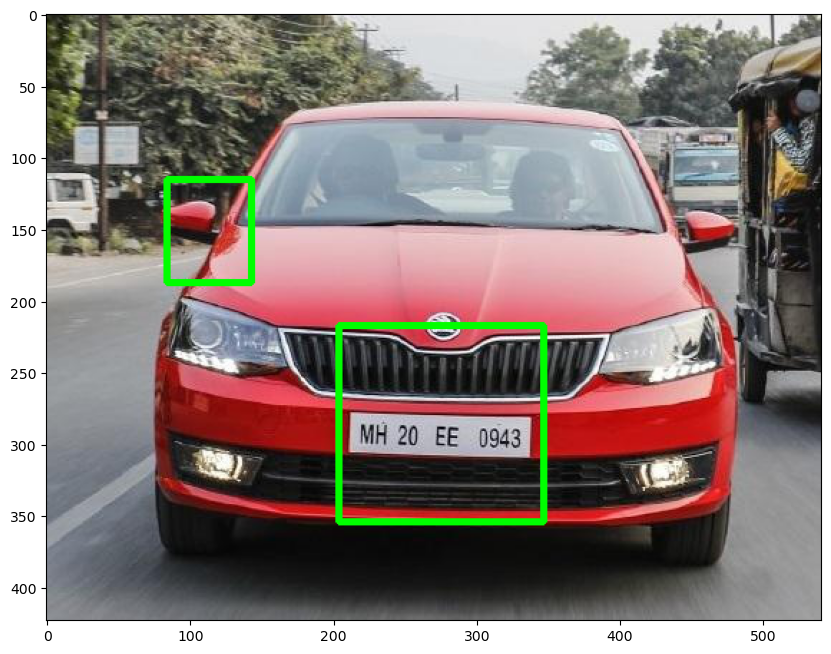

In [263]:
# Draw bounding box on top of the image
xmin, xmax, ymin, ymax = coords[0] 
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)

print(pt1, pt2)

cv2.rectangle(image, pt1, pt2, (0, 255, 0), 3)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.show()

In [265]:
# create the pipeline
path = './test_images/N207.jpeg'
def object_detection(path):
    # read image
    image = load_img(path) #PIL object
    image = np.array(image,dtype = np.uint8) # 8 bit array (0, 255)
    image1 = load_img(path, target_size = (224, 224))
    # data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 # convert into array and get the normalized output
    h , w , d = image.shape
    test_arr = image_arr_224.reshape(1, 224, 224, 3)
    # make predictions
    coords = model.predict(test_arr)
    # denormalize the values
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    # draw bounding on top the image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image, pt1, pt2,(0, 255, 0), 3)
    return image, coords 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step
(404, 466) (687, 759)


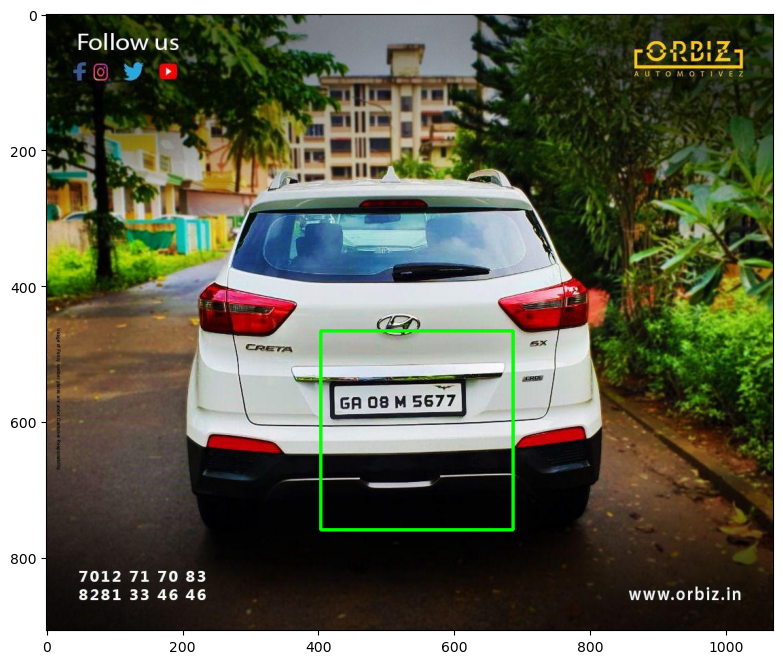

In [267]:
path='./test_images/N147.Jpeg'
image, cods = object_detection(path) 
plt.figure(figsize=(10,8)) 
plt.imshow(image) 
plt.show()

### Optical Charactr Recognition -OCR

In [270]:
import pytesseract as pt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 871ms/step
(204, 217) (347, 354)


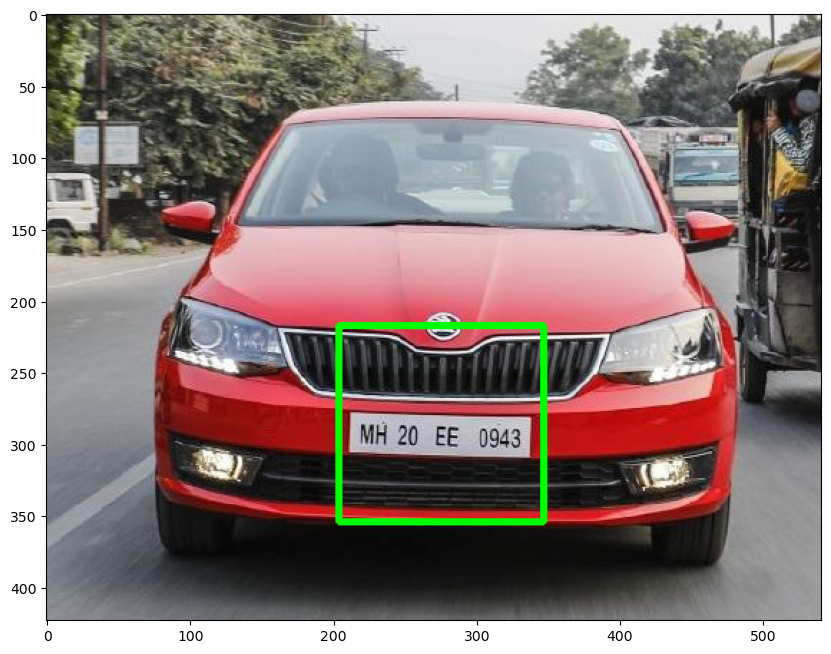

In [272]:
path='./test_images/N207.jpeg' 
image, cods = object_detection(path) 
plt.figure(figsize=(10,8)) 
plt.imshow(image) 
plt.show()

In [274]:
img = np.array(load_img(path))
xmin, xmax, ymin, ymax = cods[0]
roi = img[ymin:ymax, xmin:xmax]

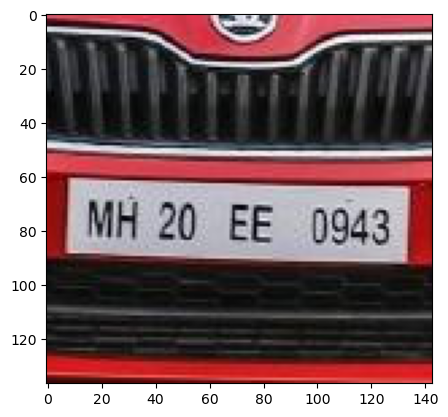

In [276]:
plt.imshow(roi)
plt.show()

In [278]:
# extract text from image 
text = pt.image_to_string(roi)
print(text)